In [1]:
#Carga de paquetes 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
import numpy as np

In [3]:
#Carga de df
df = pd.read_csv('temp_pre.csv', index_col = 0)

In [4]:
#PCA del df a 2 dimensiones 
pca = PCA(n_components = 2)
x_pca =pca.fit_transform(df)

In [41]:
#Se mantiene una varianzia del 0.99, trabajamos con los dos componentes. 
pca.explained_variance_ratio_

array([0.98051039, 0.01444278])

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x_pca)

In [7]:
#choosing numb of clusters
kmeans_kwargs = {'init': 'random', 
                'n_init': 10, 
                'max_iter': 300, 
                'random_state': 42}

#A list holds the SSE values for each k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)#** is a python unpacking operator 
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

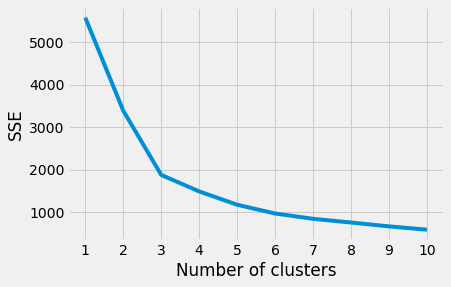

In [8]:
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [9]:
kl = KneeLocator(range(1,11), sse, curve = 'convex', direction = 'decreasing')
kl.elbow

3

In [18]:
#A list hold the silhouetter coefficients for each k
silhouette_coefficients = []
#Notice you start at 2 clusters for silhouette coefficient
for k in range (2,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

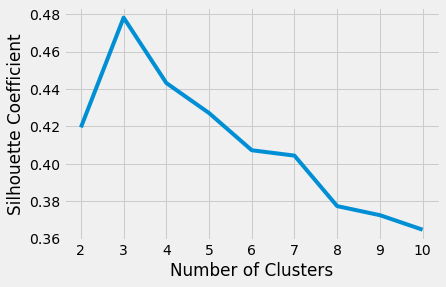

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [11]:
#Se utilizan 3 clusters. 
kmeans = KMeans(init = 'random', n_clusters = 3, n_init = 20, max_iter = 300, random_state = 42)
label = kmeans.fit_predict(df)

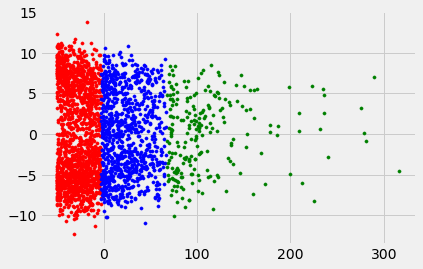

In [13]:
plt.scatter(x_pca[label == 0 , 0], x_pca[label ==0,1], s = 10, c = 'red', label = 'cluster 1')
plt.scatter(x_pca[label == 1 , 0], x_pca[label ==1,1], s = 10, c = 'blue', label = 'cluster 2')
plt.scatter(x_pca[label == 2 , 0], x_pca[label ==2,1], s = 10, c = 'green', label = 'cluster 3')

plt.show()

Vemos como los clusters se clasifican en funcion de la media de lluvias. 

Se hace un analisis de los clusters. 

In [25]:
df['cluster'] = label

In [43]:
df['Mes'][df.cluster == 0].value_counts()

1     186
2     174
4     167
3     159
6     154
5     148
7     136
10    123
9     120
8     118
11     78
12     76
Name: Mes, dtype: int64

In [32]:
df[df.cluster == 0].describe()

,Mes,Precipitacions,Temperatura,clusters,cluster
count,1639.000000,1639.000000,1639.000000,1639.0,1639.0
mean,5.685784,21.013545,14.658023,0.0,0.0
std,3.302160,13.903469,5.901988,0.0,0.0
min,1.000000,0.000000,2.500000,0.0,0.0
25%,3.000000,8.650000,9.400000,0.0,0.0
50%,5.000000,20.400000,13.400000,0.0,0.0
75%,8.000000,32.800000,20.400000,0.0,0.0
max,12.000000,47.000000,28.500000,0.0,0.0


In [45]:
df['Mes'][df.cluster == 1].value_counts()

12    112
11    107
9     102
8      92
10     81
7      78
5      77
6      61
4      60
3      60
2      49
1      43
Name: Mes, dtype: int64

In [44]:
df[df.cluster == 1].describe()

,Mes,Precipitacions,Temperatura,clusters,cluster
count,922.000000,922.000000,922.000000,922.0,922.0
mean,7.421909,72.886985,14.500759,1.0,1.0
std,3.330978,18.962315,5.011627,0.0,0.0
min,1.000000,46.900000,3.600000,1.0,1.0
25%,5.000000,56.325000,10.200000,1.0,1.0
50%,8.000000,69.400000,14.400000,1.0,1.0
75%,10.000000,86.975000,18.800000,1.0,1.0
max,12.000000,116.200000,25.400000,1.0,1.0


In [46]:
df['Mes'][df.cluster == 2].value_counts()

11    50
12    46
10    30
8     19
7     17
6     15
9     13
3     11
2      9
4      6
5      5
1      4
Name: Mes, dtype: int64

In [35]:
df[df.cluster == 2].describe()

,Mes,Precipitacions,Temperatura,clusters,cluster
count,225.000000,225.000000,225.000000,225.0,225.0
mean,8.817778,160.546667,14.271556,2.0,2.0
std,3.120732,46.557737,4.459259,0.0,0.0
min,1.000000,116.800000,4.300000,2.0,2.0
25%,7.000000,128.000000,10.500000,2.0,2.0
50%,10.000000,146.900000,14.800000,2.0,2.0
75%,11.000000,171.700000,17.800000,2.0,2.0
max,12.000000,365.800000,22.900000,2.0,2.0


Quando se hace el analisis se aprecia como la frecuencia de meses por clusters cambia, de esta forma el cluster 1 el mes con más frequencia es el mes 1 (julio) i el de menos el mes 12 septiembre, resultado invertido en el cluster final que tiene los meses con más precipitaciones. 
No se encuentra ninguna diferencia en la media de temperatura en los clusters realizados. 

Dict_mesos = {1 : 3, 
              2 : 2 ,
              3 : 7,
              4 : 9, 
              5 : 8,
              6 : 4, 
              7 : 1, 
              8: 5, 
              9: 12 ,
              10 : 11 , 
              11: 10, 
              12 : 6}